In [33]:
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from math import log
import numpy as np

In [4]:
with open('kjv.txt', 'r') as f:
    text = f.read()
    text = text.replace('\n', ' ')
    text += ' '

with open('jungle.txt', 'r') as f:
    text += f.read()

In [9]:
sentences = sent_tokenize(text)
words = [w for s in sentences for w in word_tokenize(s)]

In [12]:
words = [w.lower() for w in words if w.isalpha()]

# Question 1
Calculate word length in terms of number of letters.

In [17]:
lengths = [len(w) for w in words]

# Question 2
Calculate the number of words at different word lengths.

In [18]:
hist = Counter(lengths)

# Question 3
What are the shortest words in your dataset? Comment on these words.

The 2-length words are mostly funciton words (e.g. prepositions like "in," "by," articles like "an," pronouns like "me," "he," conjunctions like "if," "as," or interjections like "hm") or very common content words ("do", "go", "is").
The 3- and higher-length words are almost exclusively content words.

In [38]:
def words_of_length(n):
    return set([w for w in words if len(w) == n])

print(words_of_length(1))
print(words_of_length(2))
print(words_of_length(3))

{'e', 'o', 's', 'h', 'a', 'c', 'l', 'b', 'i'}
{'hm', 'ur', 'ox', 'ca', 'in', 'do', 'is', 'we', 'ah', 'so', 'by', 'ho', 'il', 'if', 'me', 'be', 'my', 'us', 'he', 'ai', 'an', 'am', 'go', 'og', 'ay', 'to', 'at', 'lo', 'hi', 'as', 'on', 'it', 'or', 'ts', 'up', 'no', 'ar', 'wo', 'ir', 'uz', 'of', 'ut', 'un', 'co', 'ha', 'oh', 'er', 'ye', 'ed', 'pg'}
{'tug', 'ill', 'jaw', 'ant', 'cry', 'bat', 'sin', 'hot', 'uri', 'ziz', 'pit', 'hem', 'gad', 'bed', 'fan', 'ask', 'tin', 'all', 'rat', 'buy', 'sky', 'dip', 'axe', 'hoe', 'huz', 'ava', 'gur', 'owe', 'age', 'tie', 'irs', 'naw', 'toe', 'rib', 'out', 'hai', 'lod', 'led', 'put', 'ein', 'ono', 'rub', 'did', 'tra', 'six', 'zif', 'nor', 'pau', 'gog', 'sap', 'any', 'ere', 'jar', 'day', 'its', 'bul', 'gin', 'ink', 'dor', 'bit', 'low', 'jew', 'koa', 'ham', 'pin', 'law', 'eye', 'met', 'sue', 'ara', 'few', 'lop', 'koz', 'dig', 'hod', 'eli', 'lay', 'had', 'sur', 'dam', 'sit', 'hum', 'man', 'heh', 'yea', 'and', 'tob', 'cis', 'mao', 'evi', 'sum', 'nag', 'but', '

# Question 4
Plot a graph with length on the X-axis and Frequency on the Y-axis

<BarContainer object of 18 artists>

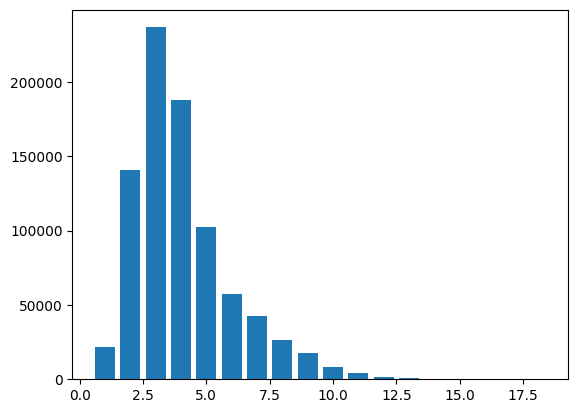

In [40]:
plt.bar(range(1, 19), [hist[i] for i in range(1, 19)])

# Question 5
Plot a graph with log10(word length) on the X-axis and log10(Frequency) on the Y-axis.

<BarContainer object of 18 artists>

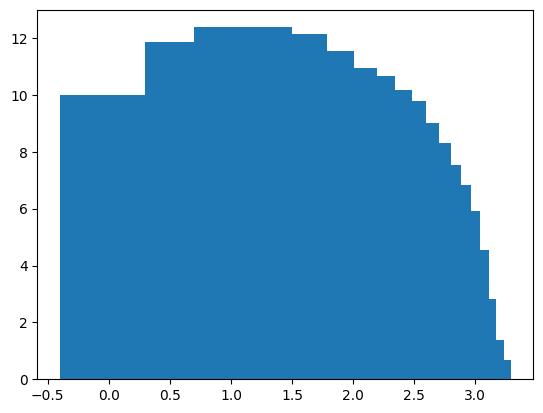

In [42]:
plt.bar([log(x) for x in range(1, 19)], [log(hist[i]) for i in range(1, 19)])

# Question 6
What is the Pearson's coefficient of correlation between length and frequency?

Ans: -0.8091937069744125

In [35]:
rho = np.corrcoef(range(2, 19), [hist[i] for i in range(2, 19)])[0, 1]

-0.8091937069744125

# Question 7
Write a short note on the question: “Are word lengths optmized for efficient communication?”

From the above, we see some evidence towards Zipf's Law, i.e., more common words tend to be shorter. However, this rule is far from universal, and is nothing more than a rough correlation – we see many extremely rare three-letter words, for instance.
This fact gives us more confidence in the thesis of the cited paper, which makes the claim that frequency is not the deciding factor, but *information content* – it is this attribute that is regulated across the lengths of words. However, our unigram-based context-independent study cannot give us any further leads on this claim.